In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('testdata/0618 (Quantity+)/online_061801_24.csv')
df.head()

,Description,Quantity,Year,Quarter,Month,DateofWeek,Hour,InvoiceDate,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,Category,ShipmentProvider,WarehouseLocation
0,White Mug,38,2020,Q1,Jan,Wed,0,2020/1/1 00:00,1.71,Australia,0.47,Bank Transfer,10.79,Apparel,UPS,London
1,White Mug,18,2020,Q1,Jan,Wed,1,2020/1/1 01:00,41.25,Spain,0.19,paypall,9.51,Electronics,UPS,Rome
2,Headphones,49,2020,Q1,Jan,Wed,2,2020/1/1 02:00,29.11,Germany,0.35,Bank Transfer,23.03,Electronics,UPS,Berlin
3,Desk Lamp,14,2020,Q1,Jan,Wed,3,2020/1/1 03:00,76.68,Netherlands,0.14,paypall,11.08,Accessories,Royal Mail,Rome
4,Office Chair,47,2020,Q1,Jan,Wed,5,2020/1/1 05:00,70.16,Sweden,0.48,Credit Card,13.98,Electronics,DHL,London


In [4]:
# 1. 資料筆數、欄位數、型別
print("Shape:", df.shape)
print(df.dtypes, "\n")

Shape: (41682, 16)
Description           object
Quantity               int64
Year                   int64
Quarter               object
Month                 object
DateofWeek            object
Hour                   int64
InvoiceDate           object
UnitPrice            float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
ShipmentProvider      object
WarehouseLocation     object
dtype: object 



In [5]:
# 2. 缺值與重複
print("缺值：\n", df.isna().sum(), "\n重複列：", df.duplicated().sum(), "\n")

缺值：
 Description            0
Quantity               0
Year                   0
Quarter                0
Month                  0
DateofWeek             0
Hour                   0
InvoiceDate            0
UnitPrice              0
Country                0
Discount               0
PaymentMethod          0
ShippingCost           0
Category               0
ShipmentProvider       0
WarehouseLocation    895
dtype: int64 
重複列： 0 



In [6]:
# 3. 數值欄摘要
num = df.select_dtypes(include='number').columns
print("Describe：\n", df[num].describe().T, "\n")

Describe：
                 count         mean        std     min        25%      50%  \
Quantity      41682.0    24.869704  14.152420     1.0    13.0000    25.00   
Year          41682.0  2021.997289   1.414389  2020.0  2021.0000  2022.00   
Hour          41682.0    11.502447   6.918653     0.0     6.0000    12.00   
UnitPrice     41682.0    50.495285  28.573640     1.0    25.7750    50.23   
Discount      41682.0     0.250731   0.144186     0.0     0.1300     0.25   
ShippingCost  41682.0    17.491050   7.216277     5.0    11.2225    17.48   

                  75%     max  
Quantity        37.00    49.0  
Year          2023.00  2024.0  
Hour            17.00    23.0  
UnitPrice       75.24   100.0  
Discount         0.38     0.5  
ShippingCost    23.72    30.0   



## Numerical Columns 的 distribution


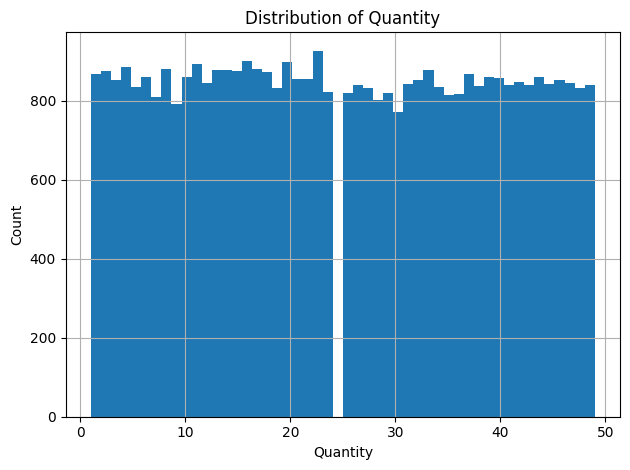

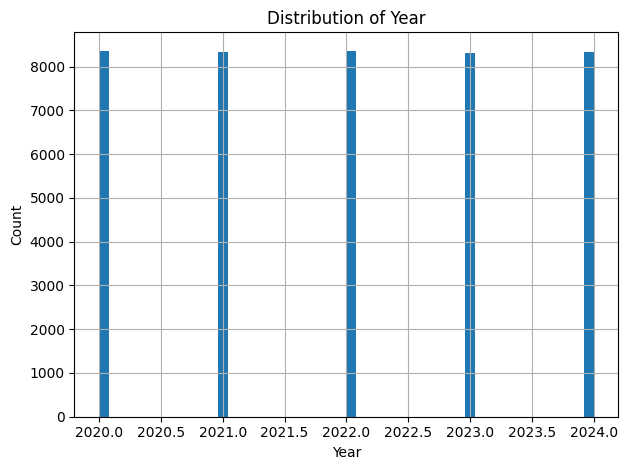

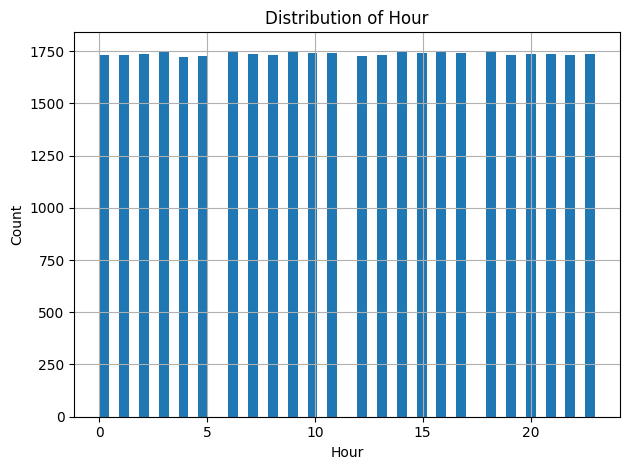

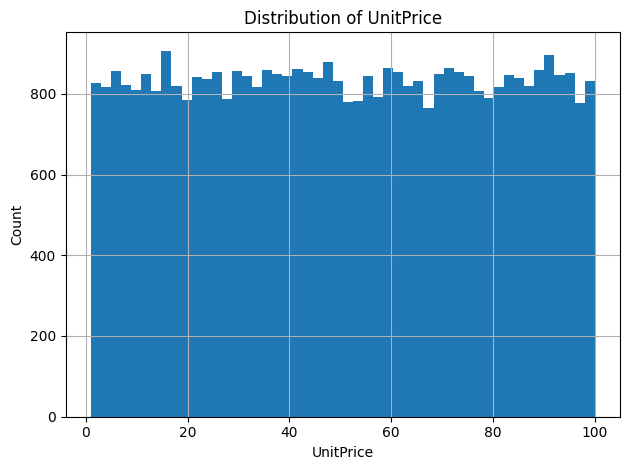

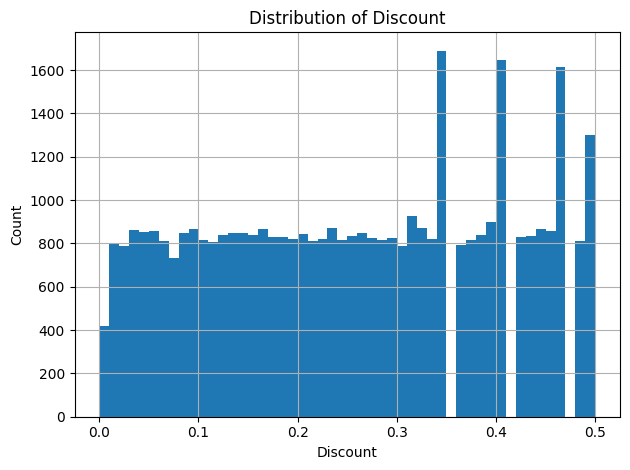

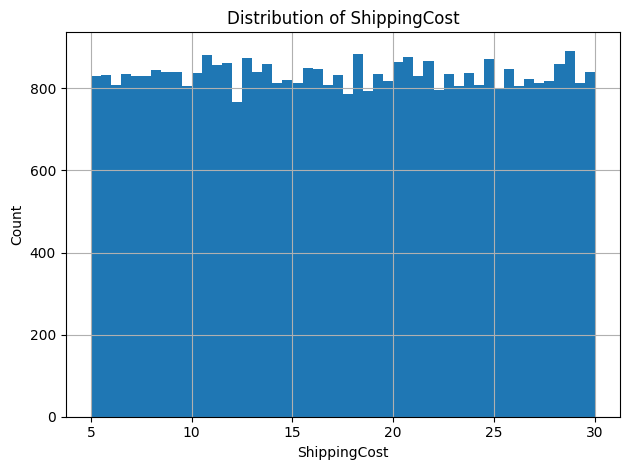

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# 找出數值欄位
num_cols = df.select_dtypes(include='number').columns.tolist()

# 繪製每個數值欄位的直方圖
for col in num_cols:
    plt.figure()
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


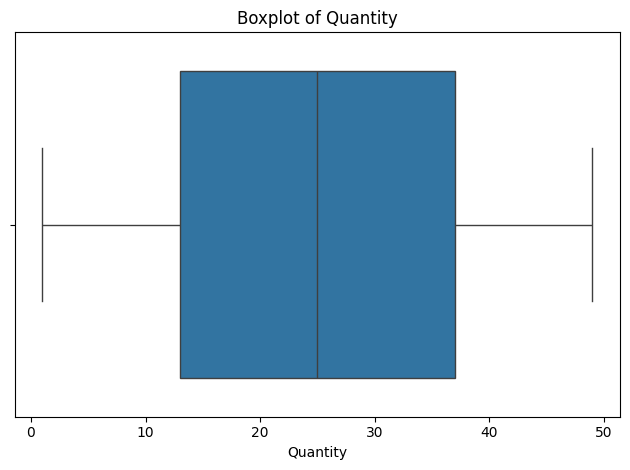

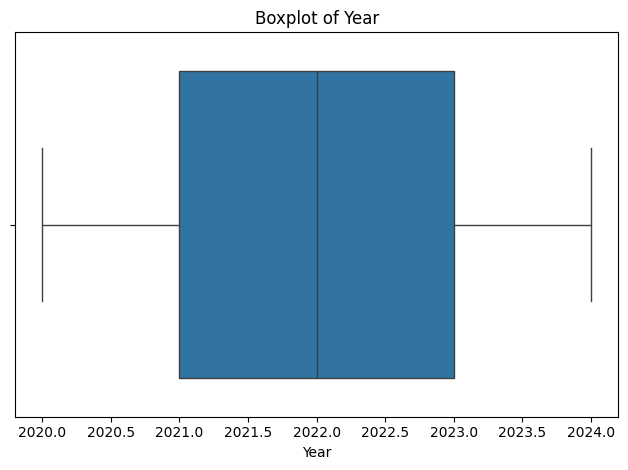

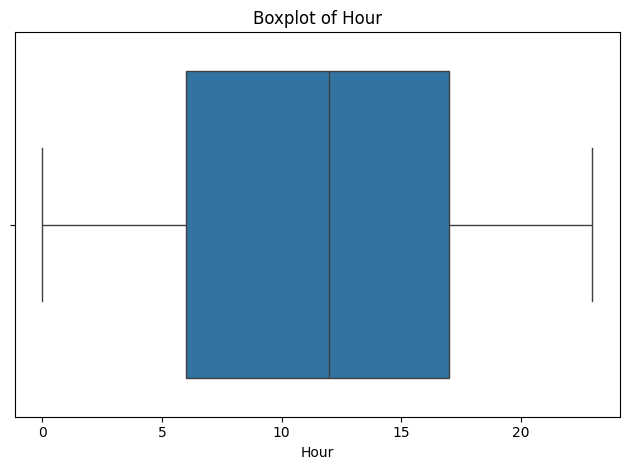

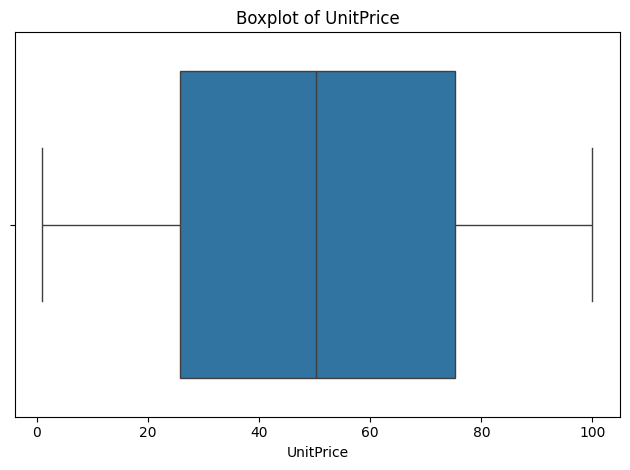

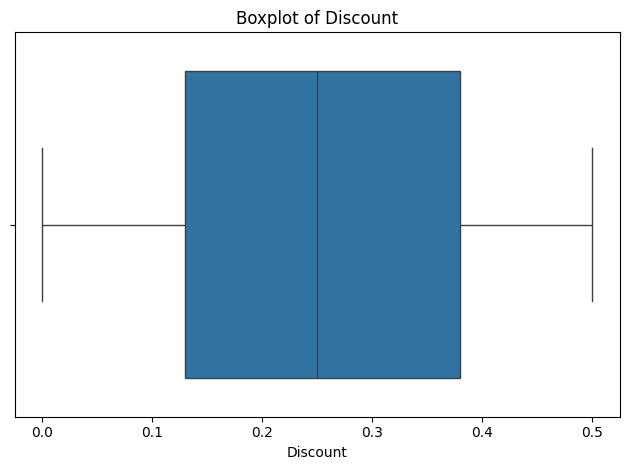

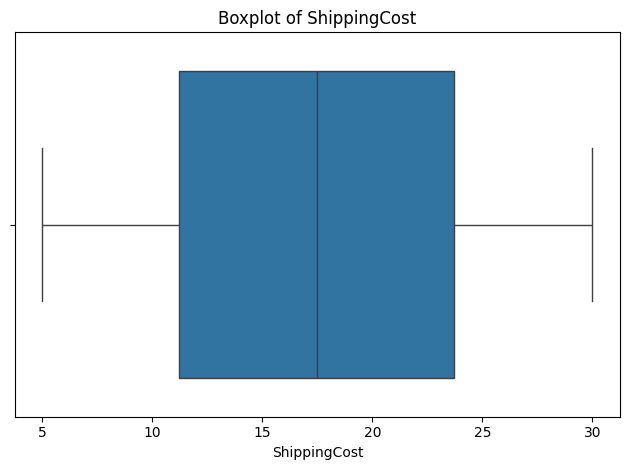

In [8]:
%pip install seaborn
import seaborn as sns

# 為每個數值欄位畫箱型圖
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


## 刪掉 Quantity 的 Outliers

In [9]:
# # 只針對 Quantity 欄位移除離群值
# def remove_outliers_iqr_single(df, col):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # 處理後的 DataFrame
# df_quantity_filtered = remove_outliers_iqr_single(df, 'Quantity')

# # 顯示處理前後筆數差異
# original_rows = df.shape[0]
# filtered_rows = df_quantity_filtered.shape[0]
# filtered_rows, original_rows, original_rows - filtered_rows


## 存成 CSV

## Categorical Columns 的 Top 10

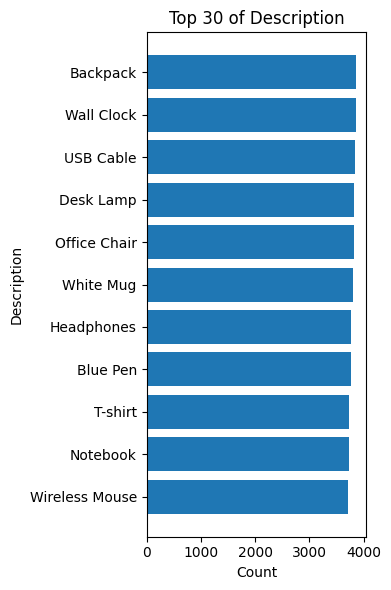

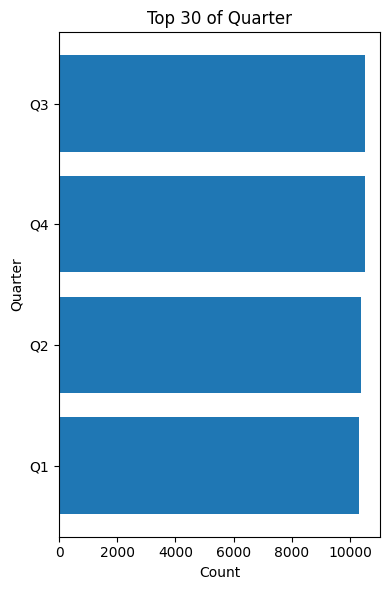

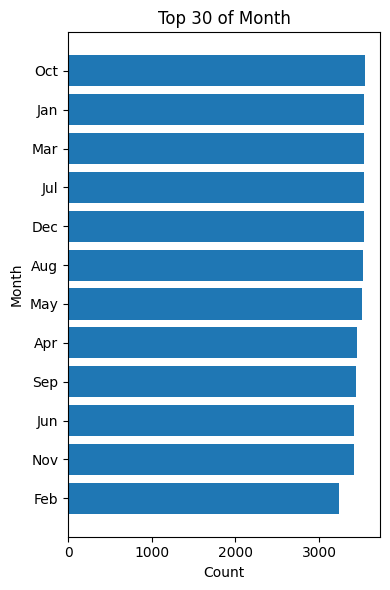

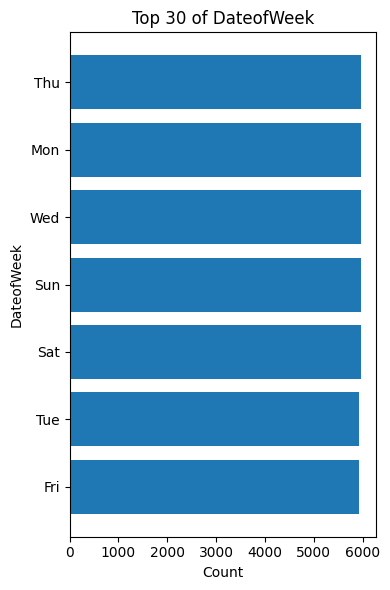

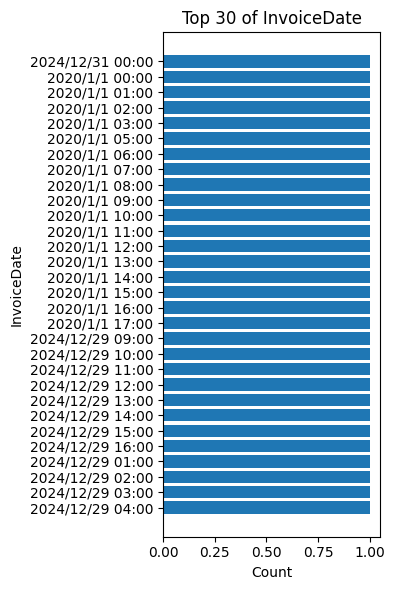

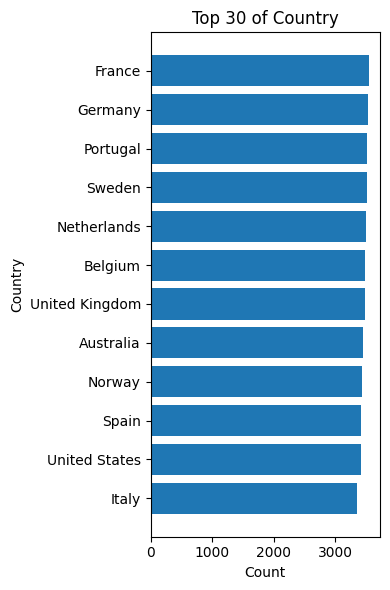

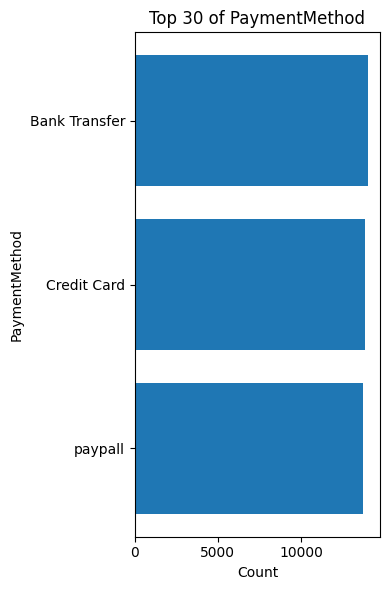

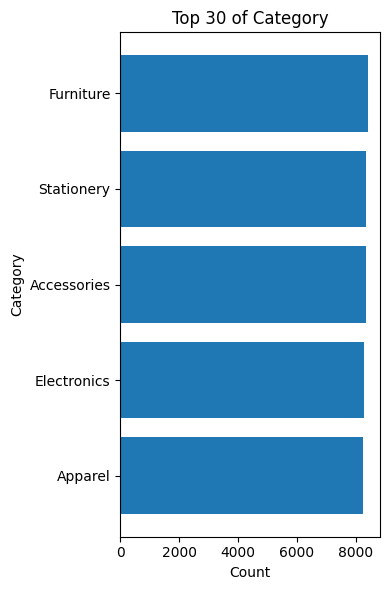

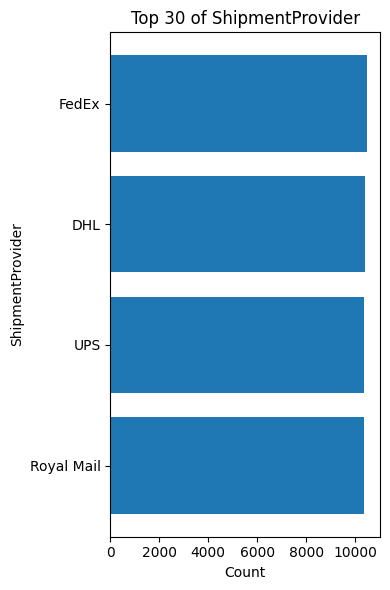

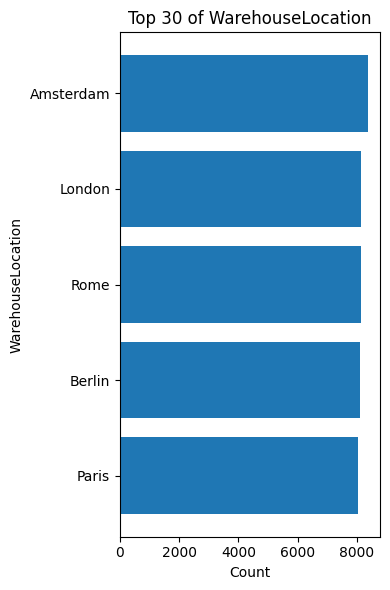

In [10]:

# 2. 找到 categorical 欄位（object 類型）
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 3. 為每個 categorical 欄位繪製 Top30 horizontal bar chart
for col in cat_cols:
    top30 = df[col].value_counts().head(30)
    plt.figure(figsize=(4, 6))
    plt.barh(top30.index.astype(str), top30.values)
    plt.title(f'Top 30 of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.gca().invert_yaxis()  # Highest at top
    plt.tight_layout()
    plt.show()


## 跟 quantity 的關係


        Feature  AbsCorrelation
0     UnitPrice        0.000213
1          Hour        0.002138
2      Discount        0.003922
3  ShippingCost        0.003963
4          Year        0.004129


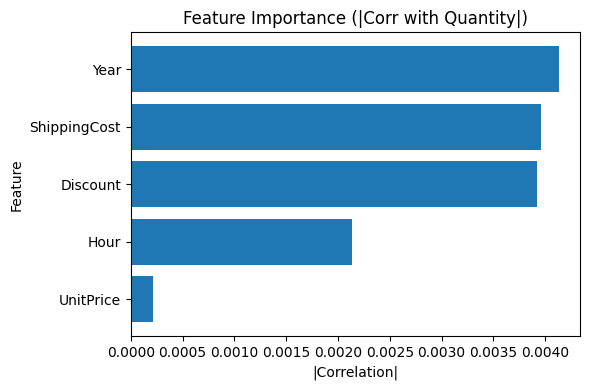

In [11]:
# 2. 數值欄位（包含 Quantity）
num_cols = df.select_dtypes(include='number').columns.tolist()

# 3. 計算 Quantity 與其他數值欄的絕對相關係數並排序
corr_with_qty = df[num_cols].corr()['Quantity'].abs().drop('Quantity').sort_values(ascending=True)

# 4. 顯示排序結果
results_df = pd.DataFrame({
    'Feature': corr_with_qty.index,
    'AbsCorrelation': corr_with_qty.values
})
print(results_df)

# 5. 繪製橫條圖
plt.figure(figsize=(6, 4))
plt.barh(results_df['Feature'], results_df['AbsCorrelation'])
plt.title('Feature Importance (|Corr with Quantity|)')
plt.xlabel('|Correlation|')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

             Feature  RangeMeanQty
4        InvoiceDate     48.000000
3         DateofWeek      0.889106
2              Month      0.780059
7           Category      0.490103
0        Description      0.488153
5            Country      0.447867
9  WarehouseLocation      0.337646
8   ShipmentProvider      0.272052
1            Quarter      0.252961
6      PaymentMethod      0.181446


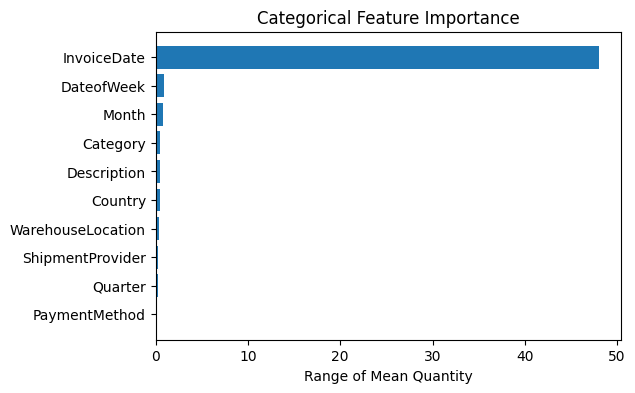

In [12]:
# 計算每個類別欄位的平均 Quantity 差異範圍
importance = []
for col in cat_cols:
    grp = df.groupby(col)['Quantity'].mean()
    importance.append((col, grp.max() - grp.min()))

imp_df = pd.DataFrame(importance, columns=['Feature','RangeMeanQty']) \
           .sort_values('RangeMeanQty', ascending=False)

print(imp_df)

plt.figure(figsize=(6,4))
plt.barh(imp_df['Feature'], imp_df['RangeMeanQty'])
plt.gca().invert_yaxis()
plt.title('Categorical Feature Importance')
plt.xlabel('Range of Mean Quantity')
plt.show()


In [13]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


              Feature  Importance
0           UnitPrice    0.144435
1        ShippingCost    0.139036
2         InvoiceDate    0.133474
3            Discount    0.102351
4                Hour    0.082503
5             Country    0.066471
6         Description    0.063623
7               Month    0.050571
8          DateofWeek    0.043942
9   WarehouseLocation    0.043050
10           Category    0.039883
11   ShipmentProvider    0.034820
12      PaymentMethod    0.025422
13            Quarter    0.021794
14               Year    0.008622


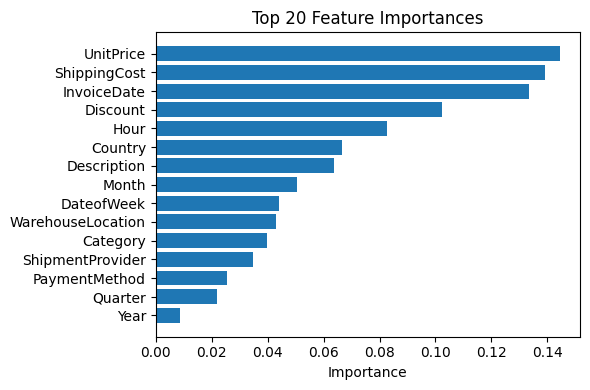

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# 2. 準備目標 y 和特徵 X
y = df['Quantity']

# 數值欄
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols.remove('Quantity')
X_num = df[num_cols].fillna(0)

# 類別欄
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Label Encoding
X_cat = pd.DataFrame()
for c in cat_cols:
    le = LabelEncoder()
    X_cat[c] = le.fit_transform(df[c].fillna('Missing'))

# 合併
X = pd.concat([X_num, X_cat], axis=1)

# 3. 訓練隨機森林
rf = RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=1)
rf.fit(X, y)

# 4. 取得重要度並排序
imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print(imp.head(15))

# 5. 繪製前 20 特徵重要度
top20 = imp.head(20)
plt.figure(figsize=(6,4))
plt.barh(top20['Feature'][::-1], top20['Importance'][::-1])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()
